In [2]:
%matplotlib inline
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import rcParams
import seaborn
from tqdm import tqdm,tqdm_gui
from scipy.optimize import curve_fit
import sympy as sm
rcParams['figure.figsize'] = (12.0, 7.0)

## Μέθοδος Διχοτόμησης (Bolzano)
Έχουμε $f(x) \in C [a_0,b_0]$ με $f(a_0)f(b_0)<0$ **δηλαδή εντός του διαστήματος υπάρχει τουλάχιστον μια ρίζα**

Διχοτομούμε το διάστημα έτσι ώστε να προσεγγίσουμε τη ρίζα της εξίσωσης $\xi$, δηλαδή δημιουργούμε ένα νέο διάστημα $[a_n,b_n]$ 
όπου
* $a_n = \frac{a_{n-1}+b_{n-1}}{2}$ αν  $f(a_{n-1})f(\frac{a_{n-1}+b_{n-1}}{2})<0$

ή

* $b_n = \frac{a_{n-1}+b_{n-1}}{2}$ αν  $f(a_{n-1})f(\frac{a_{n-1}+b_{n-1}}{2})>0$ 
(άρα $f(\frac{a_{n-1}+b_{n-1})f(n_{n-1})}{2})<0$ )

η ακολουθία $b_n-a_n=\frac{b_0-a_0}{2^n}$ συγκλίνει στη ρίζα $\xi$ με σφάλμα:
$$
\epsilon = \big| \xi - \frac{b_0-a_0}{2^n} \big|
$$
δηλαδή για δεδομένο σφάλμα $\epsilon$ η ταχύτητα σύγκλισης είναι:
$$
n=\frac{\log(b_0-a_0)-\log 2\epsilon}{\log 2}
$$


In [3]:
def f(x):
    return 20.-x**2

In [44]:
xx=np.linspace(-6.,6.,100)

In [45]:
f(xx)

array([-16.        , -14.56014692, -13.1496786 , -11.76859504,
       -10.41689624,  -9.09458219,  -7.80165289,  -6.53810836,
        -5.30394858,  -4.09917355,  -2.92378329,  -1.77777778,
        -0.66115702,   0.42607897,   1.48393021,   2.51239669,
         3.51147842,   4.48117539,   5.4214876 ,   6.33241506,
         7.21395776,   8.0661157 ,   8.88888889,   9.68227732,
        10.44628099,  11.18089991,  11.88613407,  12.56198347,
        13.20844812,  13.82552801,  14.41322314,  14.97153352,
        15.50045914,  16.        ,  16.47015611,  16.91092746,
        17.32231405,  17.70431589,  18.05693297,  18.38016529,
        18.67401286,  18.93847567,  19.17355372,  19.37924702,
        19.55555556,  19.70247934,  19.82001837,  19.90817264,
        19.96694215,  19.99632691,  19.99632691,  19.96694215,
        19.90817264,  19.82001837,  19.70247934,  19.55555556,
        19.37924702,  19.17355372,  18.93847567,  18.67401286,
        18.38016529,  18.05693297,  17.70431589,  17.32

In [53]:
xx[:7]

array([-6.        , -5.87878788, -5.75757576, -5.63636364, -5.51515152,
       -5.39393939, -5.27272727])

In [54]:
xx[::2]

array([-6.        , -5.75757576, -5.51515152, -5.27272727, -5.03030303,
       -4.78787879, -4.54545455, -4.3030303 , -4.06060606, -3.81818182,
       -3.57575758, -3.33333333, -3.09090909, -2.84848485, -2.60606061,
       -2.36363636, -2.12121212, -1.87878788, -1.63636364, -1.39393939,
       -1.15151515, -0.90909091, -0.66666667, -0.42424242, -0.18181818,
        0.06060606,  0.3030303 ,  0.54545455,  0.78787879,  1.03030303,
        1.27272727,  1.51515152,  1.75757576,  2.        ,  2.24242424,
        2.48484848,  2.72727273,  2.96969697,  3.21212121,  3.45454545,
        3.6969697 ,  3.93939394,  4.18181818,  4.42424242,  4.66666667,
        4.90909091,  5.15151515,  5.39393939,  5.63636364,  5.87878788])

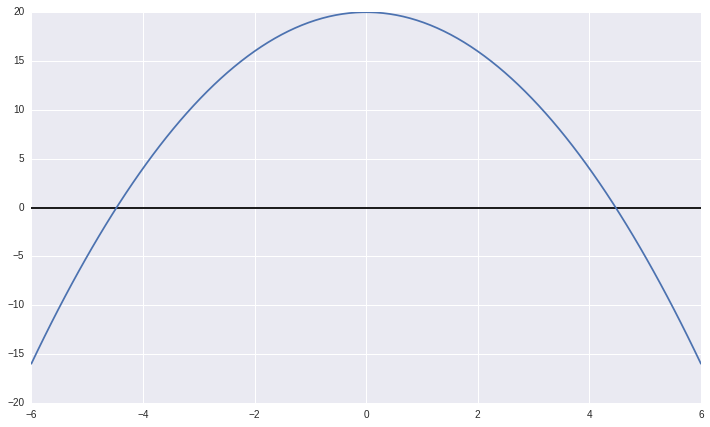

In [58]:
plt.plot(xx,f(xx))
plt.hlines(0,xx[0],xx[-1])

In [69]:
def Bolzano(f,a0,b0,d):
    print((np.log(b0-a0)-np.log(2.*d))/np.log(2.))
    a=a0
    b=b0
    c=(a+b)/2
    i=0
    while np.abs(f(c))>d:
        print(i,c)
        if f(a)*f(c)<0.:
            b=c
        else:
            a=c
        c=(a+b)/2.
        i=i+1
    return c

In [70]:
Bolzano(f,2.,6.,0.00001)

17.6096404744
(0, 4.0)
(1, 5.0)
(2, 4.5)
(3, 4.25)
(4, 4.375)
(5, 4.4375)
(6, 4.46875)
(7, 4.484375)
(8, 4.4765625)
(9, 4.47265625)
(10, 4.470703125)
(11, 4.4716796875)
(12, 4.47216796875)
(13, 4.471923828125)
(14, 4.4720458984375)
(15, 4.47210693359375)
(16, 4.472137451171875)
(17, 4.4721221923828125)
(18, 4.472129821777344)
(19, 4.472133636474609)


4.472135543823242

## Μέθοδος Εσφαλμένης Θέσης (Regula Falsi)
Όπως η BOlzano με τη νέα θέση να βρισκεται από την εξίσωση της ευθείας που ενώνει τα $(a_{n-1},f(a_{n-1})$ και $(b_{n-1},f(b_{n-1})$ άρα:

* $a_n = b_{n-1}-f(B_{n-1})\frac{a_{n-1}+b_{n-1}}{f(a_{n-1})+f(b_{n-1})}$ αν  $f(a_{n-1})f(\frac{a_{n-1}+b_{n-1}}{2})<0$

ή

*  $b_n = b_{n-1}-f(B_{n-1})\frac{a_{n-1}+b_{n-1}}{f(a_{n-1})+f(b_{n-1})}$ αν  $f(a_{n-1})f(\frac{a_{n-1}+b_{n-1}}{2})>0$ 


In [73]:
def RegulaFalsi(f,a0,b0,d):
    a=a0
    b=b0
    c=b-f(b)*(b-a)/(f(b)-f(a))
    i=0
    while np.abs(f(c))>d:
        print i,c
        if f(a)*f(c)<0.:
            b=c
        else:
            a=c
        c=b-f(b)*(b-a)/(f(b)-f(a))
        i=i+1
    return c

In [75]:
RegulaFalsi(f,2.,6.,0.00001)

0 4.0
1 4.4
2 4.46153846154
3 4.47058823529
4 4.47191011236
5 4.47210300429
6 4.47213114754


4.4721352536005

## Μέθοδος Σταθερού Σημείου

In [9]:
def StablePoint(f,x0,d):
    g=lambda x: x-f(x)
    x=f(x)

In [10]:
g= lambda x: x-f(x)

In [11]:
g(0)

-20.0

## Άσκηση (2015)
1) Να υπολογίσετε τις δύο πραγματικές ρίζες της εξίσωσης $e^x-4x=0$ με:
* την επαναληπτική μέθοδο σταθερού σημείου
* την μέθοδο Newton

**Κάνοντας για κάθε μία μέθοδο 6 βήματα**

In [77]:
def f(x):
    return np.exp(x)-4.*x
def fd(x):
    return np.exp(x)-4.
def f1(x):
    return np.exp(x)
def f2(x):
    return 4.*x

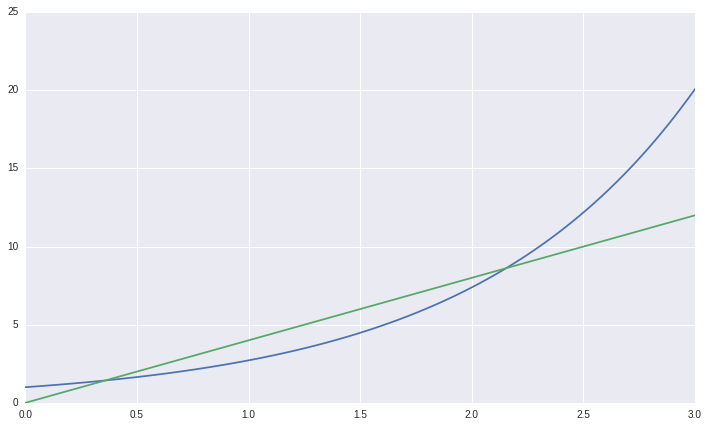

In [78]:
xx=np.linspace(0,3,100)
plt.plot(xx,f1(xx))
plt.plot(xx,f2(xx))

Προσπαθώ αν δημιουργήσω μια επαναληπτική εξίσωση: $f(x)=0\rightarrow e^x=4x \rightarrow x= \ln (4x) \rightarrow x=\ln 4 +\ln x$

Άρα βρίσκουμε ότι:
$$
x_{n+1}=\ln 4 +\ln x_n =g_1(x)
$$

Αντίστοιχα: $e^x=4x \rightarrow x=\frac{e^x}{4}$, άρα
$$
x_{n+1}=\frac{e^{x_n}}{4} =g_2(x)
$$

**Συγκλίνει?**
* H $g_1(x)=\ln 4 +\ln x$ ;έχει παράγωγο $g_1'(x)=\frac{1}{x}$
* Η $g_2(x)=\frac{e^x}{4}$ έχει παράγωγο $g_2'(x)=\frac{e^x}{4}$

In [79]:
def g1(x): return np.log(4.)+np.log(x)
def g1d(x): return 1./x
def g2(x): return np.exp(x)/4.
def g2d(x): return np.exp(x)/4.

In [88]:
g1d(xx)

array([         inf,  33.        ,  16.5       ,  11.        ,
         8.25      ,   6.6       ,   5.5       ,   4.71428571,
         4.125     ,   3.66666667,   3.3       ,   3.        ,
         2.75      ,   2.53846154,   2.35714286,   2.2       ,
         2.0625    ,   1.94117647,   1.83333333,   1.73684211,
         1.65      ,   1.57142857,   1.5       ,   1.43478261,
         1.375     ,   1.32      ,   1.26923077,   1.22222222,
         1.17857143,   1.13793103,   1.1       ,   1.06451613,
         1.03125   ,   1.        ,   0.97058824,   0.94285714,
         0.91666667,   0.89189189,   0.86842105,   0.84615385,
         0.825     ,   0.80487805,   0.78571429,   0.76744186,
         0.75      ,   0.73333333,   0.7173913 ,   0.70212766,
         0.6875    ,   0.67346939,   0.66      ,   0.64705882,
         0.63461538,   0.62264151,   0.61111111,   0.6       ,
         0.58928571,   0.57894737,   0.56896552,   0.55932203,
         0.55      ,   0.54098361,   0.53225806,   0.52

In [98]:
xx[np.abs(g1d(xx))<1][0]

1.0303030303030303

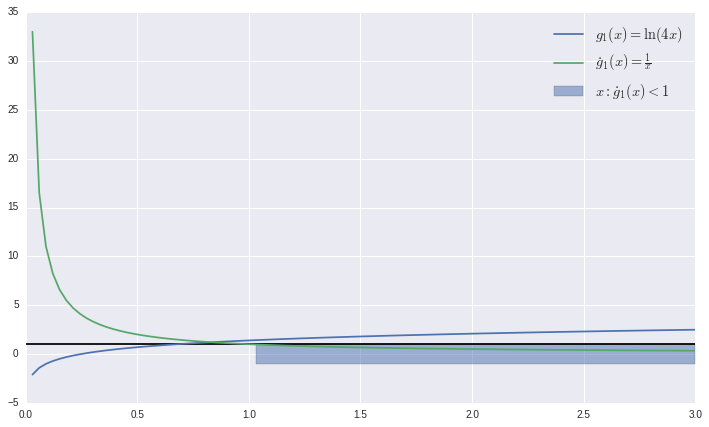

In [99]:
plt.plot(xx,g1(xx),label=r'$g_1(x)=\ln (4x)$')
plt.plot(xx,np.abs(g1d(xx)),label=r'$\dot{g}_1(x)=\frac{1}{x}$')
plt.hlines(1.,xx[0],xx[-1])
plt.fill_betweenx([-1,1],xx[np.abs(g1d(xx))<1][0],xx[np.abs(g1d(xx))<1][-1],alpha=0.5,label=r'$x:\dot{g}_1(x)<1$')
plt.legend(loc='best',fontsize='x-large')

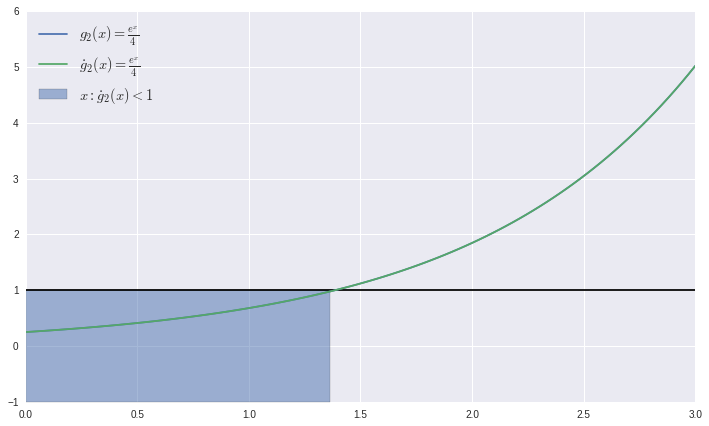

In [100]:
plt.plot(xx,g2(xx),label=r'$g_2(x)=\frac{e^x}{4}$')
plt.plot(xx,np.abs(g2d(xx)),label=r'$\dot{g}_2(x)=\frac{e^x}{4}$')
plt.hlines(1.,xx[0],xx[-1])
plt.fill_betweenx([-1,1],xx[g2d(xx)<1][0],xx[g2d(xx)<1][-1],alpha=0.5,label=r'$x:\dot{g}_2(x)<1$')
plt.legend(loc='best',fontsize='x-large')

In [101]:
guess=1.2
x1=np.array([guess])
x1

array([ 1.2])

In [102]:
np.arange(6)

array([0, 1, 2, 3, 4, 5])

0 1.2 1.2
1 1.56861591791 0.830029230684
2 1.83648801071 0.57334644413
3 1.99414941904 0.443548592629
4 2.07651196418 0.389556732929
5 2.11698390689 0.369081560503


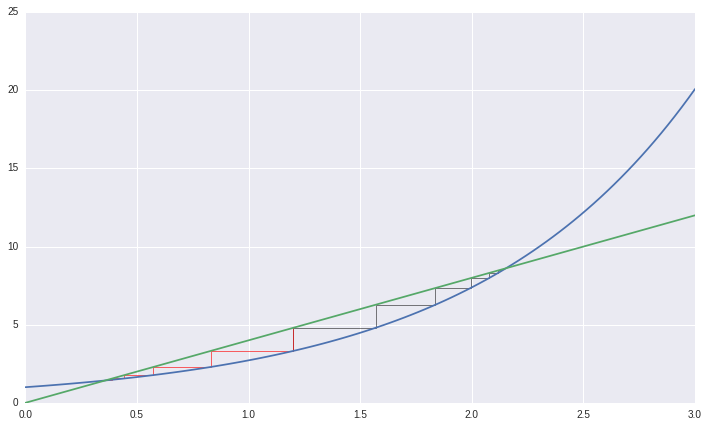

In [106]:
guess=1.2
x1=np.array([guess])
x2=np.array([guess])
xx=np.linspace(0,3,100)
plt.plot(xx,f1(xx))
plt.plot(xx,f2(xx))
for n in np.arange(6):
    plt.vlines(x1[-1],f1(x1[-1]),f2(x1[-1]),linestyles='-',linewidth=0.5)
    plt.vlines(x2[-1],f2(x2[-1]),f1(x2[-1]),linestyles='-',linewidth=0.6,color='r')
    print n,x1[-1],x2[-1]
    x1=np.append(x1,g1(x1[-1]))
    x2=np.append(x2,g2(x2[-1]))
    plt.hlines(f2(x1[-2]),x1[-2],x1[-1],linestyles='-',linewidth=0.5)
    plt.hlines(f1(x2[-2]),x2[-2],x2[-1],linestyles='-',linewidth=0.6,color='r')

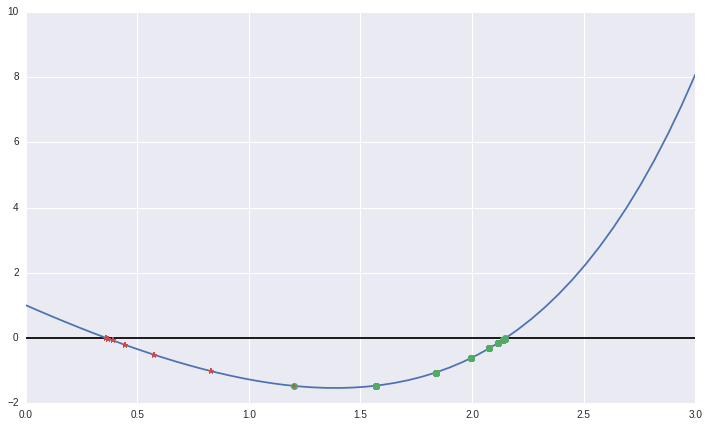

In [108]:
xx=np.linspace(0,3)
plt.plot(xx,g(xx))
plt.hlines(0,xx[0],xx[-1])
plt.plot(x1,g(x1),'o')
plt.plot(x2,g(x2),'*')

## Newton - Raphson Method
$$
x_{n+1}=x_n-\frac{f(x_n)}{f'(x_n)}
$$

0 0.4
1 0.356870916376
2 0.357402877514
3 0.357402956181
4 0.357402956181
5 0.357402956181


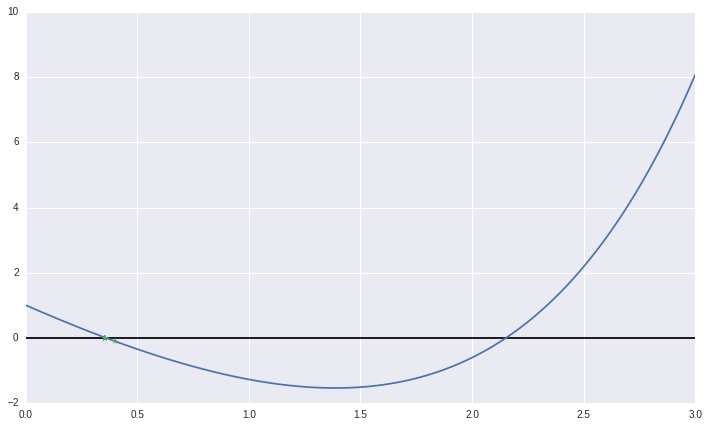

In [109]:
guess=0.4
x=np.array([guess])
xx=np.linspace(0,3,100)
plt.plot(xx,f(xx))
for n in np.arange(6):
    print n,x[-1]
    x=np.append(x,x[-1]-f(x[-1])/fd(x[-1]))
plt.hlines(0,xx[0],xx[-1])
plt.plot(x,f(x),'*')

2) Κατασκευάστε υπολογιστικό αλγόριθμο για την επίλυση της εξίσωσης: 
$x^3 +4x^2 -10=0$ με τη μέθοδο διχοτόμησης. 
* Υπάρχει λύση στο διάστημα [1,2];

Αν ναι, πόσα βήματα απαιτούνται για να επιτύχουμε ακρίβεια 3 ου
σημαντικού ψηφίου;

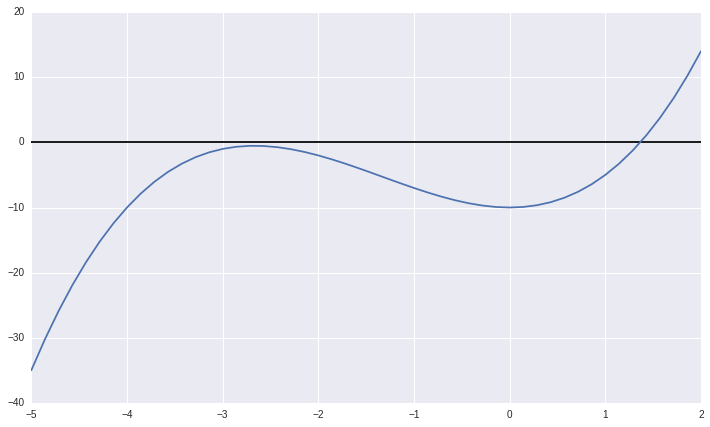

In [112]:
def f(x): return x**3+4.*x**2-10.
xx=np.linspace(-5,2)
plt.plot(xx,f(xx))
plt.hlines(0,xx[0],xx[-1])

In [113]:
def Bolzano2(f,a0,b0,d):
    a=a0
    b=b0
    c=(a+b)/2
    cp=0
    i=0
    while np.abs(c-cp)>d:
        print i,c
        if f(a)*f(c)<0.:
            b=c
        else:
            a=c
        cp=c
        c=(a+b)/2.
        i=i+1
        if i>100:
            break
    return c

In [127]:
Bolzano(f,1.,2.,0.001)

8.96578428466
(0, 1.5)
(1, 1.25)
(2, 1.375)
(3, 1.3125)
(4, 1.34375)
(5, 1.359375)
(6, 1.3671875)
(7, 1.36328125)


1.365234375

In [ ]:
1.3642578125,1.36517333984